# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

____

## Exercício 2

## Imports

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


import tensorflow as tf

In [106]:
df_mushrooms = pd.read_csv('datasets/mushrooms.csv', sep=',')

In [107]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [149]:
le = preprocessing.LabelEncoder()

df_mushrooms_number = df_mushrooms.apply(lambda linha : le.fit_transform(linha))

In [151]:
df_mushrooms_number.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [152]:
Y = df_mushrooms_number[['class']] #Target
X = df_mushrooms_number.drop(['class'], axis=1) #Features

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [157]:
num_classes = Y.nunique()
num_features = len(X.columns)

In [158]:
# Criando o modelo

In [165]:
mushrooms_model = tf.keras.Sequential()

mushrooms_model.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=5, kernel_initializer='uniform'))
mushrooms_model.add(tf.keras.layers.Dense(activation='softmax', units=num_classes))
mushrooms_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/mushrooms.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
hist = mushrooms_model.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/50
2271/2274 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8844
Epoch 1: val_accuracy improved from -inf to 0.92267, saving model to modelos\mushrooms.hdf5
2274/2274 [==============================] - 7s 3ms/step - loss: 0.3131 - accuracy: 0.8846 - val_loss: 0.2195 - val_accuracy: 0.9227
Epoch 2/50
2263/2274 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9222
Epoch 2: val_accuracy improved from 0.92267 to 0.94376, saving model to modelos\mushrooms.hdf5
2274/2274 [==============================] - 6s 2ms/step - loss: 0.2123 - accuracy: 0.9222 - val_loss: 0.1872 - val_accuracy: 0.9438
Epoch 3/50
2247/2274 [============================>.] - ETA: 0s - loss: 0.1810 - accuracy: 0.9312
Epoch 3: val_accuracy did not improve from 0.94376
2274/2274 [==============================] - 6s 3ms/step - loss: 0.1798 - accuracy: 0.9316 - val_loss: 0.1402 - val_accuracy: 0.9402
Epoch 4/50
2274/2274 [==============================] - ETA: 0s - los

Epoch 29/50
2257/2274 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9929
Epoch 29: val_accuracy did not improve from 0.99649
2274/2274 [==============================] - 5s 2ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0137 - val_accuracy: 0.9965
Epoch 30/50
2255/2274 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9929
Epoch 30: val_accuracy did not improve from 0.99649
2274/2274 [==============================] - 6s 2ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0198 - val_accuracy: 0.9938
Epoch 31/50
2259/2274 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9927
Epoch 31: val_accuracy did not improve from 0.99649
2274/2274 [==============================] - 6s 2ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 0.0135 - val_accuracy: 0.9965
Epoch 32/50
2249/2274 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9942
Epoch 32: val_accuracy did not improve from 0.996

In [167]:
mushrooms_classificacao_best = tf.keras.models.load_model('modelos/mushrooms.hdf5')

In [168]:
test_results = mushrooms_classificacao_best.evaluate(X_test, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

77/77 [==============================] - 1s 4ms/step - loss: 0.0125 - accuracy: 0.9967
Resultado dos testes - Loss: 0.012469792738556862 - Accuracy: 0.9967186450958252%


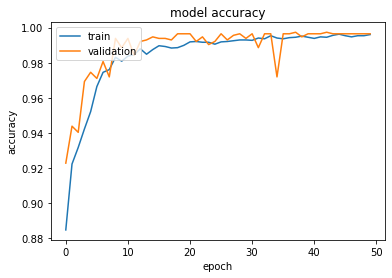

In [169]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()